#Muthu Palaniappan M - 21011101079 NLP EX 1


## Importing Packages

In [1]:
import nltk
from nltk import ngrams
from nltk.probability import FreqDist, ConditionalFreqDist
from nltk.corpus import brown, movie_reviews, reuters

## Downloading the Packages

In [2]:
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [3]:
nltk.download("reuters")

[nltk_data] Downloading package reuters to /root/nltk_data...


True

In [4]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

## Data Points Curation for the better results

In [5]:
ques_data = ["Mr Patrick is our new principle","The company excepted all the terms","Please don't keep your dog on the lose","The later is my best friend","I need some stationary products for my craftwork","The actor excepted the Oscar","I will call you later in the evening","Covid affects the lungs","The council of the ministers were sworn in yesterday","Robert too wants to accompany us to the park","Mia will council me about choosing fashion as my career", "The bear at the zoo was very playful","The sheep have a lot of fur that keeps them warm","The hot spring is at the furthest corner of the street","Can you advice me on how to study for exams","The team will loose the match if they don't play well","Can you go to the market for me","The teachers asked the students to keep quite", "The heap of garbage should be cleaned immediately","This is there house","Mr Patrick is our new principal","The company accepted all the terms","Please don't keep your dog on the loose","The latter is my best friend","I need some stationery products for my craftwork","The actor accepted the Oscar","I will call you later in the evening","Covid affects the lungs","The council of the ministers were sworn in yesterday","Robert too wants to accompany us to the park","Mia will counsel me about choosing fashion as my career", "The bear at the zoo was very playful","The sheep have a lot of fur that keeps them warm","The hot spring is at the farthest corner of the street","Can you advise me on how to study for exams","The team will lose the match if they don't play wel.","Can you go to the market for me","The teachers asked the students to keep quiet", "The heap of garbage should be cleaned immediately","This is their house","Mr Patrick is our new principal","The company accepted all the terms","Please don't keep your dog on the loose","The latter is my best friend","I need some stationery products for my craftwork","The actor accepted the Oscar","I will call you later in the evening","Covid affects the lungs","The council of the ministers were sworn in yesterday","Robert too wants to accompany us to the park","Mia will counsel me about choosing fashion as my career", "The bear at the zoo was very playful","The sheep have a lot of fur that keeps them warm","The hot spring is at the farthest corner of the street","Can you advise me on how to study for exams","The team will lose the match if they don't play well","Can you go to the market for me","The teachers asked the students to keep quiet", "The heap of garbage should be cleaned immediately","This is their house"]

ques_data.extend(ques_data)

ques_words = []
for i in ques_data:
    ques_words.extend(i.split())

In [6]:
len(ques_words)

948

## Helper Functions

In [7]:
def generate_ngrams(text, n):
    '''
    Returns the n_grams for the text
    Input Parameters
    - text: (list) the vocab for the model
    - n: (int) bi,tri,etc.. N-gram params
    Returns
    n_grams list
    '''
    n_grams = ngrams(text, n)
    return n_grams

In [8]:
def build_ngram_model(tokens, n):
    '''
    Returns the
    Conditional frequency
    distributions are used to record the number of times each sample
    occurred
    Input Paramters
    - tokens: (list) the vocab for the lm-model
    - n: (int) bi and tri
    Returns
    ConditionalFreqDist
    '''
    n_grams = generate_ngrams(tokens,n)
    if n == 3:
      conditional_pairs = (((w0,w1),w2) for w0,w1,w2 in n_grams)
    if n == 2:
      conditional_pairs = n_grams
    return nltk.ConditionalFreqDist(conditional_pairs)

In [29]:
def predict_next_word(model, context, word):
    '''
    Returns the next token based on the context with the help of lm-model CDF
    Input Parameters
    - model: (ConditionalFreqDist) Frequency Dict
    - context: (str) Context to predict the next word
    - word: (token) To predict
    Returns
    Probability value for the token (word) based on the context
    '''
    context_tuple = tuple(context.split())
    #print(context_tuple)
    if context_tuple in model and word in model[context_tuple]:
        return model[context_tuple].freq(word)
    else:
        return 0.0

## Vocabulary Creation

In [10]:
## Creating vocab based on different corpus -> Issue lack of tokens
vocab = brown.words() + movie_reviews.words() + reuters.words() + ques_words
print(f"The length of the Vocabulary for the language Model: {len(vocab)}")

The length of the Vocabulary for the language Model: 4466861


## Model Building

In [11]:
##Building model for the tri-grams settings
tri_model = build_ngram_model(vocab,3)

In [12]:
##Building mode for the uni-grams settings
bi_model = build_ngram_model(vocab,2)

In [13]:
## Getting the value for the bi-grams settings
bi_model['to']

FreqDist({'the': 8637, 'be': 5993, 'a': 2487, 'make': 1372, 'see': 1161, 'do': 1126, 'have': 1040, 'get': 989, 'take': 851, 'his': 736, ...})

In [14]:
## Getting the value for the point based on the context
tri_model[('to','the')].freq('point')

0.008220446914437884

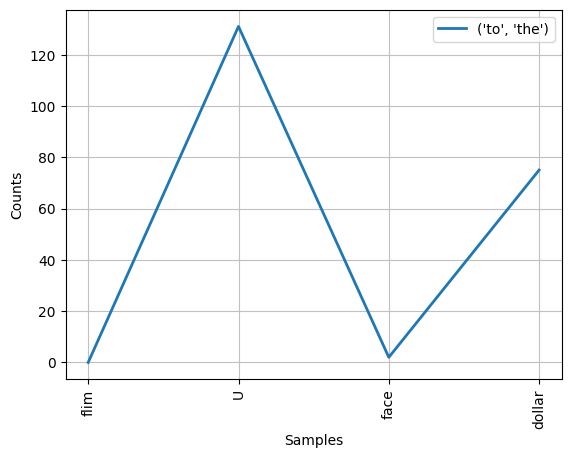

<Axes: xlabel='Samples', ylabel='Counts'>

In [15]:
## Plotting the Values
tri_model.plot(conditions=[("to","the")],samples=['flim',"U" ,'face',"dollar"])

In [16]:
## Getting the most common words
tri_model[("to","the")].most_common(3)

[('U', 131), ('film', 93), ('dollar', 75)]

## Next Token Prediction

In [18]:
tri_model[("our","new")]

FreqDist({'principal': 4, 'principle': 2, 'view': 1, 'presses': 1, 'Junior': 1, 'pool': 1, 'carts': 1, 'space': 1, 'plant': 1, 'bosom': 1, ...})

In [20]:
context = "our new"
word_1 = "principal"
word_2 = "principle"
cdf_1 = predict_next_word(tri_model,context,word_1)
cdf_2 = predict_next_word(tri_model,context,word_2)

if cdf_1 > cdf_2:
  print(f"{context} {word_1}")

else:
  print(f"{context} {word_2}")

our new principal


In [21]:
tri_model[("lot","of")]

FreqDist({'fun': 35, 'the': 34, 'people': 31, 'money': 24, 'time': 12, 'sense': 7, 'it': 6, 'things': 6, 'fur': 6, 'good': 5, ...})

In [32]:
##Predicting Outputs for tri-grams settings
contexts = [
    "our new",
    "The company",
    "on the",
    "need some",
    "The actor",
    "call you",
    "Mia will",
    "lot of",
    "at the",
    "Can you",
    "team will",
    "you go",
    "to keep",
    "This is"
]

word_options_list = [
    ["principal", "principle"],
    ["excepted", "accepted"],
    ["lose", "loose"],
    ["stationary", "stationery"],
    ["excepted", "accepted"],
    ["later", "latter"],
    ["council","counsel"],
    ["council","counsel"],
    ["fur", "far"],
    ["furthest", "farthest"],
    ["advice", "advise"],
    ["loose", "lose"],
    ["to", "too"],
    ["quite", "quiet"],
    ["there","their"]
]

for context, word_options in zip(contexts, word_options_list):
    cdf_1 = predict_next_word(tri_model,context,word_options[0])
    cdf_2 = predict_next_word(tri_model,context,word_options[1])

    if cdf_1 > cdf_2:
      print(f"{context} {word_options[0]}")

    else:
      print(f"{context} {word_options[1]}")

our new principal
The company accepted
on the loose
need some stationery
The actor accepted
call you later
Mia will counsel
lot of counsel
at the far
Can you farthest
team will advise
you go lose
to keep to
This is quiet


In [33]:
##Predicting output for unigrams settings
contexts = [
    "The",
    "Covid",
    "The",
    "Robert",
    "The",
    "The"
]

word_options_list = [
    ["later", "latter"],
    ["affects", "effects"],
    ["council", "counsel"],
    ["too", "to"],
    ["bear", "bare"],
    ["fur", "far"],
    ["their", "there"]
]

for context, word_options in zip(contexts, word_options_list):
    cdf_1 = predict_next_word(bi_model,context,word_options[0])
    cdf_2 = predict_next_word(bi_model,context,word_options[1])

    if cdf_1 > cdf_2:
      print(f"{context} {word_options[0]}")

    else:
      print(f"{context} {word_options[1]}")

The latter
Covid effects
The counsel
Robert to
The bare
The far
